In [1]:
def main():
    n = int(input())
    magnets = []
    for i in range(n):
        magnets.append(input())

    groups = 0
    current_group = []
    for magnet in magnets:
        if magnet[0] == magnet[1]:
            current_group.append(magnet)
        else:
            groups += 1
            current_group = []
            current_group.append(magnet)

    groups += 1

    print(groups)

if __name__ == "__main__":
    main()


7


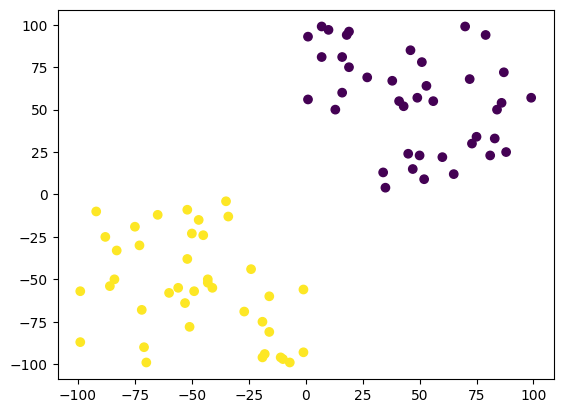

The predictions are:
[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



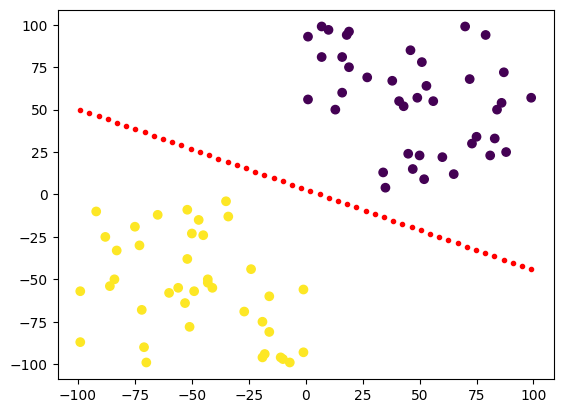

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split


d1=np.random.randint(low=1,high=100,size=(50,2))
d2=-d1
X=np.concatenate((d1,d2),axis=0)
y=np.ones(shape=100)
y[:50]=0

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

plt.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train)
plt.show()


nsamples=X_train.shape[0]
nfeatures=X_train.shape[1]

#weigths and biases:
w=np.random.uniform(0,1,size=nfeatures)
b=np.random.uniform(0,1,1)
lr=0.01
n_epoch=int(input("Enter no: of epochs:"))

for epoch in range(n_epoch):
    for samples in range(nsamples):
        net=np.dot(X_train[samples,:],w)+b
        if net>=0:
            a=1
        else:
            a=0
        error=y_train[samples]-a
        w=w+lr*error*X_train[samples,:]
        b=b+lr*error

net = np.dot(X_test,w)+b
pred=list(map(int,(net>=0)))
print("The predictions are:")
print(pred)

print("Classification report:")
print(classification_report(y_true=y_test,y_pred=pred))

m=-w[0]/w[1]
c=-b/w[1]
def plt_decision_boundry(X):
    for x in np.linspace(np.min(X[:,0]),np.max(X[:,0])):
        y=m*x+c
        plt.plot(x,y,linestyle='dotted',color='r',marker='.')
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
    plt.show()

plt_decision_boundry(X_train)
